# **Exercise 05: boxplot**

Prepare the project:

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import allowed modules:

In [3]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt

Import allowed entities:

In [4]:
from typing import Any
from pandas import DataFrame
from matplotlib.pyplot import Figure, Axes

Depricated all warnings:

In [5]:
warnings.filterwarnings("ignore", )

Create a dictionary for `read_csv()` method calling:

In [6]:
read_csv_params: dict = {"file": "ab-test.csv", "file_path": "../../data/", }

## Read the data from the [file](https://drive.google.com/file/d/1B6M7Ku89ViIStXvWU6j7PyDnCTb0McEI/view?usp=sharing) to a *Pandas* dataframe:

In [7]:
df: DataFrame = pd.read_csv(read_csv_params["file_path"] + read_csv_params["file"], )

Check *Pandas* dataframe:

In [8]:
df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


Split *Pandas* dataframe to `before` and `after`:

In [9]:
df_after: DataFrame = df[df["time"] == "after"].drop(columns=["uid", "time", ], )
df_before: DataFrame = df[df["time"] == "before"].drop(columns=["uid", "time", ], )

Check them:

In [10]:
df_after.head()

,diff,group
0,-103.333333,test
2,-10.000000,test
4,-82.333333,test
6,-78.500000,test
8,-127.500000,test


In [11]:
df_before.head()

,diff,group
1,-6.000000,test
3,-3.500000,test
5,-148.000000,test
7,-112.500000,test
9,-69.333333,test


Split *pandas* dataframes into 2 groups:

In [12]:
df_before_test: DataFrame = df_before[df_before["group"] == "test"].drop(columns=["group", ], )
df_before_ctrl: DataFrame = df_before[df_before["group"] == "control"].drop(columns=["group", ], )

In [13]:
df_after_test: DataFrame = df_after[df_after["group"] == "test"].drop(columns=["group", ], )
df_after_ctrl: DataFrame = df_after[df_after["group"] == "control"].drop(columns=["group", ], )

Check them:

In [14]:
df_before_test.head()

,diff
1,-6.000000
3,-3.500000
5,-148.000000
7,-112.500000
9,-69.333333


In [15]:
df_before_ctrl.head()

,diff
15,-103.0
17,-15.5
19,-3.0
21,-153.0
23,-202.0


In [16]:
df_after_test.head()

,diff
0,-103.333333
2,-10.000000
4,-82.333333
6,-78.500000
8,-127.500000


In [17]:
df_after_ctrl.head()

,diff
14,-75.0
16,-81.5
18,-32.0
20,17.5
22,-94.0


## The `figsize=` is still the same, you can choose whatever `fontsize=` you like.

## The color palette should be the same as in the example.

## The `fontsize=` of the title is `16`.

## The width of the box lines is `3`, the width of the median lines is `2`:

Create a dictionaries for: whiskers, arrows, boxs, medians, fleirs:

In [18]:
whiskers_params: dict = dict(color="red", linewidth=1, )
boxs_params: dict = dict(color="green", linewidth=3, )
medians_params: dict = dict(color="red", linewidth=2, )
fliersparams: dict = dict(marker='o', color="black", )
arrows_params: dict = dict(
    color="green",
    linewidth=0.5,
    arrowstyle="simple,head_length=0.75,head_width=0.5,tail_width=0.5",
)

Create a plot:

In [19]:
%%capture

fig, axes = plt.subplots(  # Subplots
    1,
    2,
    sharey=True,
    figsize=(16, 8, ),
)
boxplot_after: Any = axes[0].boxplot(  # boxplot # 1
    [df_after_ctrl["diff"], df_after_test["diff"], ],
    boxprops=boxs_params,
    flierprops=fliersparams,
    capprops=whiskers_params,
    medianprops=medians_params,
    whiskerprops=whiskers_params,
)
boxplot_before: Any = axes[1].boxplot(  # boxplot # 2
    [df_before_ctrl["diff"], df_before_test["diff"], ],
    boxprops=boxs_params,
    flierprops=fliersparams,
    capprops=whiskers_params,
    medianprops=medians_params,
    whiskerprops=whiskers_params,
)

Draw plot:

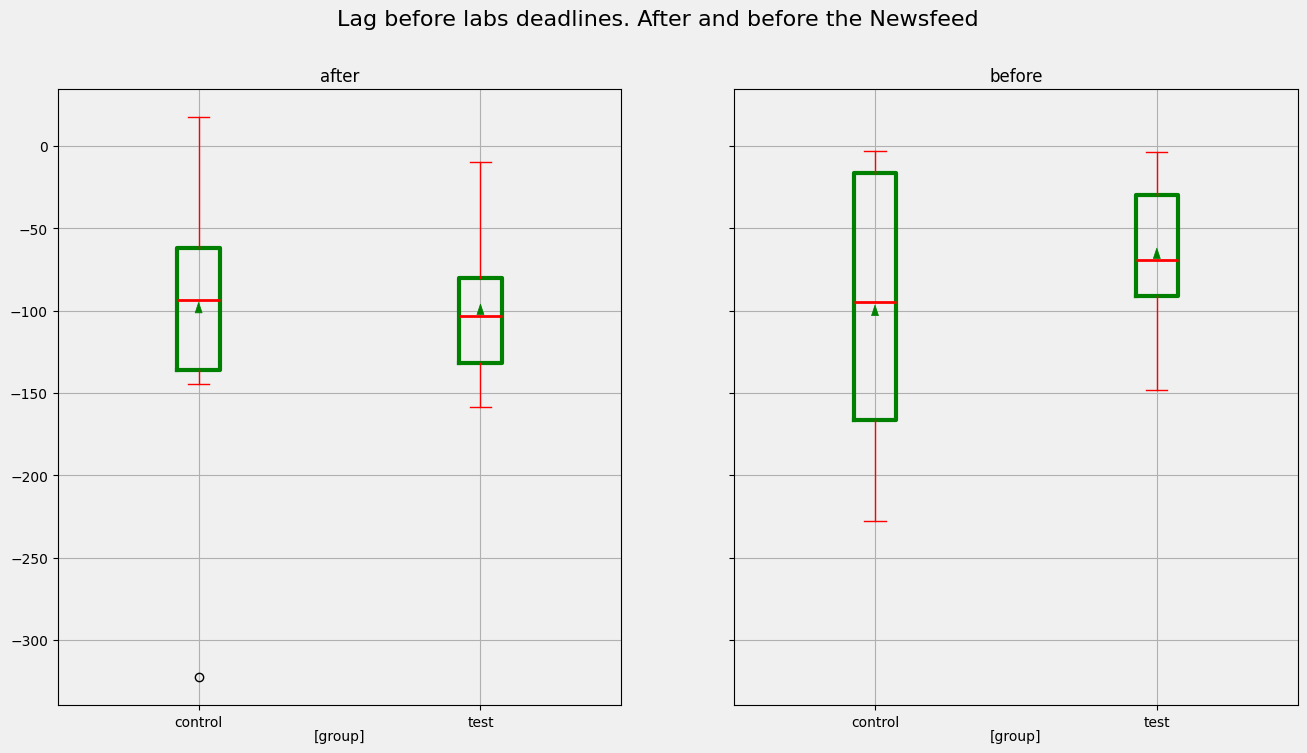

In [20]:
x: float = (boxplot_after["medians"][0].get_xdata()[0] + boxplot_after["medians"][0].get_xdata()[1]) / 2
y: float = boxplot_after["medians"][0].get_ydata()[0]

axes[0].annotate(
    '',
    xy=(x, y, ),
    ha="center",
    xytext=(x, y - 9, ),
    arrowprops=arrows_params,
)

x = (boxplot_after["medians"][1].get_xdata()[0] + boxplot_after["medians"][1].get_xdata()[1]) / 2
y = boxplot_after["medians"][1].get_ydata()[0]

axes[0].annotate(
    '',
    xy=(x, y + 9, ),
    ha="center",
    xytext=(x, y, ),
    arrowprops=arrows_params,
)

x = (boxplot_before["medians"][0].get_xdata()[0] + boxplot_before["medians"][0].get_xdata()[1]) / 2
y = boxplot_before["medians"][0].get_ydata()[0]

axes[1].annotate(
    '',
    xy=(x, y, ),
    ha="center",
    xytext=(x, y - 9, ),
    arrowprops=arrows_params,
)

x = (boxplot_before["medians"][1].get_xdata()[0] + boxplot_before["medians"][1].get_xdata()[1]) / 2
y = boxplot_before["medians"][1].get_ydata()[0]

axes[1].annotate(
    '',
    xy=(x, y + 9, ),
    ha="center",
    xytext=(x, y, ),
    arrowprops=arrows_params,
)

axes[0].text(
    0.5,
    -0.05,
    "[group]",
    ha="center",
    fontsize=10,
    va="center",
    transform=axes[0].transAxes,
)
axes[1].text(
    0.5,
    -0.05,
    "[group]",
    ha="center",
    fontsize=10,
    va="center",
    transform=axes[1].transAxes,
)

axes[0].set_title("after", )
axes[0].set_xticklabels(["control", "test", ], )
axes[0].grid(True, axis='x', )
axes[0].grid(True, axis='y', )
axes[1].set_title("before", )
axes[1].set_xticklabels(["control", "test", ], )
axes[1].grid(True, axis='x', )
axes[1].grid(True, axis='y', )

for ax in axes:
    ax.set_facecolor("#f0f0f0", )

fig.suptitle("Lag before labs deadlines. After and before the Newsfeed", fontsize=16, )
fig.set_facecolor("#f0f0f0", )

display(fig, )

## At the end of *Jupyter Notebook*, create a markdown cell and insert the question: `"What was the *IQR* of the control group before the newsfeed?"`

In [21]:
print(f"The IQR of the control group before the newsfeed is {float(df_before_ctrl.quantile(0.75, ) - df_before_ctrl.quantile(0.25, ))}.", )

The IQR of the control group before the newsfeed is 150.0.
